In [1]:
import os 
import mne
import contextlib
from ASR.asr import ASR
from mne.preprocessing import ICA
from tqdm import tqdm
from pipe import DS004504


root = "/mnt/w/Dementia_Project/Datasets/ds004504/"
dataset = DS004504(root)

In [2]:
preprocessed_path = os.path.join(root, "preprocessed") # Do NOT Change the name!
os.makedirs(preprocessed_path, exist_ok=True)


In [3]:

def preprocess_signals(raw_path):
    with contextlib.redirect_stdout(open(os.devnull, 'w')):
        raw = mne.io.read_raw_eeglab(raw_path, preload=True)
        raw.resample(250, npad="auto")
        iir_params = dict(order=1, ftype='butter')
        raw.filter(l_freq=0.5, h_freq=40.0, method='iir', iir_params=iir_params, verbose=True)
           
        asr = ASR(sfreq=raw.info['sfreq'], cutoff=17, win_len=0.5)
        asr.fit(raw)
        raw = asr.transform(raw)
        ica = ICA(n_components=19, random_state=97, max_iter="auto")
        ica.fit(raw)
    return raw 


def save_preprocess(filtered_signal, preprocessed_path):
    file_name = os.path.basename(preprocessed_path)
    sub = os.path.dirname(os.path.dirname(preprocessed_path))
    os.makedirs(sub,  exist_ok=True)
    eeg = os.path.join(sub, "eeg")
    os.makedirs(eeg,  exist_ok=True)
    filtered_signal.export(preprocessed_path, overwrite=True)
    
    
    
    
"""    
for i in tqdm(dataset[:50]):
    filtered = preprocess_signals(i['raw_path'])
    save_preprocess(filtered, i['preprocessed_path'])
    
for i in tqdm(dataset[51:88]):
    filtered = preprocess_signals(i['raw_path'])
    save_preprocess(filtered, i['preprocessed_path'])
"""   
    


"    \nfor i in tqdm(dataset[:50]):\n    filtered = preprocess_signals(i['raw_path'])\n    save_preprocess(filtered, i['preprocessed_path'])\n    \nfor i in tqdm(dataset[51:88]):\n    filtered = preprocess_signals(i['raw_path'])\n    save_preprocess(filtered, i['preprocessed_path'])\n"

In [4]:
# This is the bad segment
raw = mne.io.read_raw_eeglab(dataset[50]['raw_path'], preload=True)

raw.resample(250, npad="auto")
iir_params = dict(order=1, ftype='butter')
raw.filter(l_freq=0.5, h_freq=40.0, method='iir', iir_params=iir_params, verbose=True)
ica = ICA(n_components=19, random_state=97, max_iter="auto")
ica.fit(raw)
   
raw.export("/mnt/w/Dementia_Project/Datasets/ds004504/preprocessed/sub-051/eeg/sub-051_task-eyesclosed_eeg.set")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 4.8s.


FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB



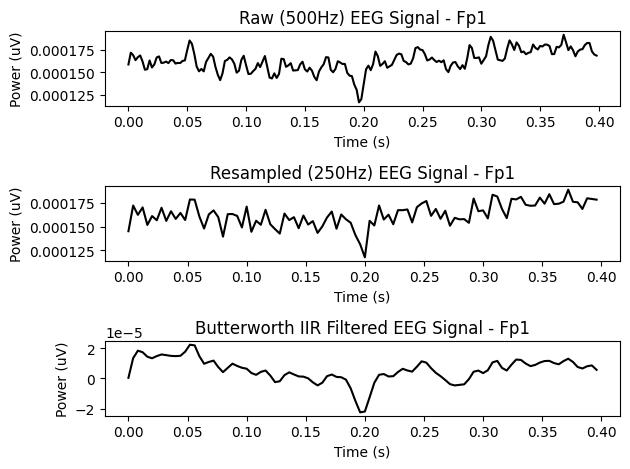

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# This is the bad segment
raw = mne.io.read_raw_eeglab(dataset[1]['raw_path'], preload=True)

# Resample
resampled = raw.copy().resample(250, npad="auto")

iir_params = dict(order=1, ftype='butter')
butter = resampled.copy().filter(l_freq=0.5, h_freq=40.0, method='iir', iir_params=iir_params, verbose=True)



# Plot raw data
plt.subplot(3, 1, 1)
plt.plot(raw.times[:200], raw.get_data(picks='Fp1')[:, :200].T, color='black')
plt.title('Raw (500Hz) EEG Signal - Fp1')
plt.ylabel('Power (uV)')
plt.xlabel('Time (s)')

# Plot resampled data
plt.subplot(3, 1, 2)
plt.plot(resampled.times[:100], resampled.get_data(picks='Fp1')[:, :100].T,  color='black')
plt.title('Resampled (250Hz) EEG Signal - Fp1')
plt.ylabel('Power (uV)')
plt.xlabel('Time (s)')

# Plot resampled data
plt.subplot(3, 1, 3)
plt.plot(butter.times[:100], butter.get_data(picks='Fp1')[:, :100].T,  color='black')
plt.title('Butterworth IIR Filtered EEG Signal - Fp1')
plt.ylabel('Power (uV)')
plt.xlabel('Time (s)')



plt.tight_layout()
plt.show()